# [프로젝트 1] 당뇨벙 수치를 맞춰보자.

사이킷런의 데이터베이스 중 하나인 sklearn.datasets을 통해서 당뇨병 수치를 맞춰보자.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. 데이터 가져오기

- sklearn.datasets의 load_diabetes에서 데이터를 가져오기
- diabetes의 data를 df_X에 target을 df_y에 저장하자



In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

print(type(diabetes))
print(diabetes.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [3]:
df_X = diabetes['data']
df_y = diabetes['target']

print(type(df_X))
print(type(df_y))
print(df_X.shape)
print(df_y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 10)
(442,)


## 2. df_X와 df_y의 값을 numpy array로 변환하기

numpy array라는 자료형은 없다. numpy.array()는 넘파이 배열을 만드는 함수이다.

In [4]:
a1 = np.array([1,2,3])
print(type(a1))
a2 = np.array([[1,2],[3,4]])
print(type(a2))
print(df_X[0])
print(type(df_X[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
<class 'numpy.ndarray'>


1차원 넘파이 배열과 2차원 넘파이 배열 모두 ndarray의 자료형이 되며,
2차원의 df_X의 1열도 ndarray이다.

sklearn의 데이터셋은 딕셔너리로 data 키의 값인 df_X는 넘파이 배열이며, target 키의 값인 df_y도 넘파이 배열이다.

### 3. train 데이터와 test 데이터로 분리하기

x와 y 데이터를 각각 train 데이터와 test 데이터로 분리하자.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=9)

print(X_train, X_test, y_train, y_test)

print(df_X.shape)
print(df_y.shape)

[[-0.00188202 -0.04464164  0.03367309 ... -0.00259226  0.02671684
   0.06105391]
 [-0.02004471 -0.04464164  0.08540807 ...  0.14501222  0.08094556
   0.05276969]
 [ 0.01628068 -0.04464164 -0.046085   ... -0.03949338 -0.05140387
   0.01963284]
 ...
 [-0.08906294 -0.04464164 -0.06117437 ... -0.0763945  -0.09393727
  -0.05492509]
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [ 0.04897352 -0.04464164  0.06061839 ... -0.00259226  0.10413565
   0.03620126]] [[-7.09002471e-02  5.06801187e-02 -8.91974838e-02 -7.45274418e-02
  -4.28475456e-02 -2.57394574e-02 -3.23559322e-02 -2.59226200e-03
  -1.29086832e-02 -5.49250874e-02]
 [-4.18399395e-02  5.06801187e-02 -2.99178198e-02 -2.22757132e-03
   2.18222388e-02  3.65770865e-02  1.18237214e-02 -2.59226200e-03
  -4.11761669e-02  6.51960131e-02]
 [-2.73097857e-02  5.06801187e-02  6.06183944e-02  4.94151933e-02
   8.51160702e-02  8.63676919e-02 -2.90282981e-03  3.43088589e-02
   3.78105297e-02  4.86275855e-02]
 [ 4.17

## 4. 모델 준비하기

- 입력 데이터 개수에 맞는 가중치 W와 b를 준비하자
- 모델 함수를 구현하자

df_X의 shape는 442,10

df_y의 shape는 442,


In [6]:
for i, feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


age, 나이
sex, 성별
bmi, 비만도
bp, 평균 혈압
s1, 전체 혈중 콜레스테롤
s2, 저밀도 지질단백질
s3, 고밀도 지질단백질
s4, 전체 혈중 콜레스테롤 / 고밀도 지질단백질
s5, 혈중 트리글리세리드 수치 로그값
s6, 혈당치

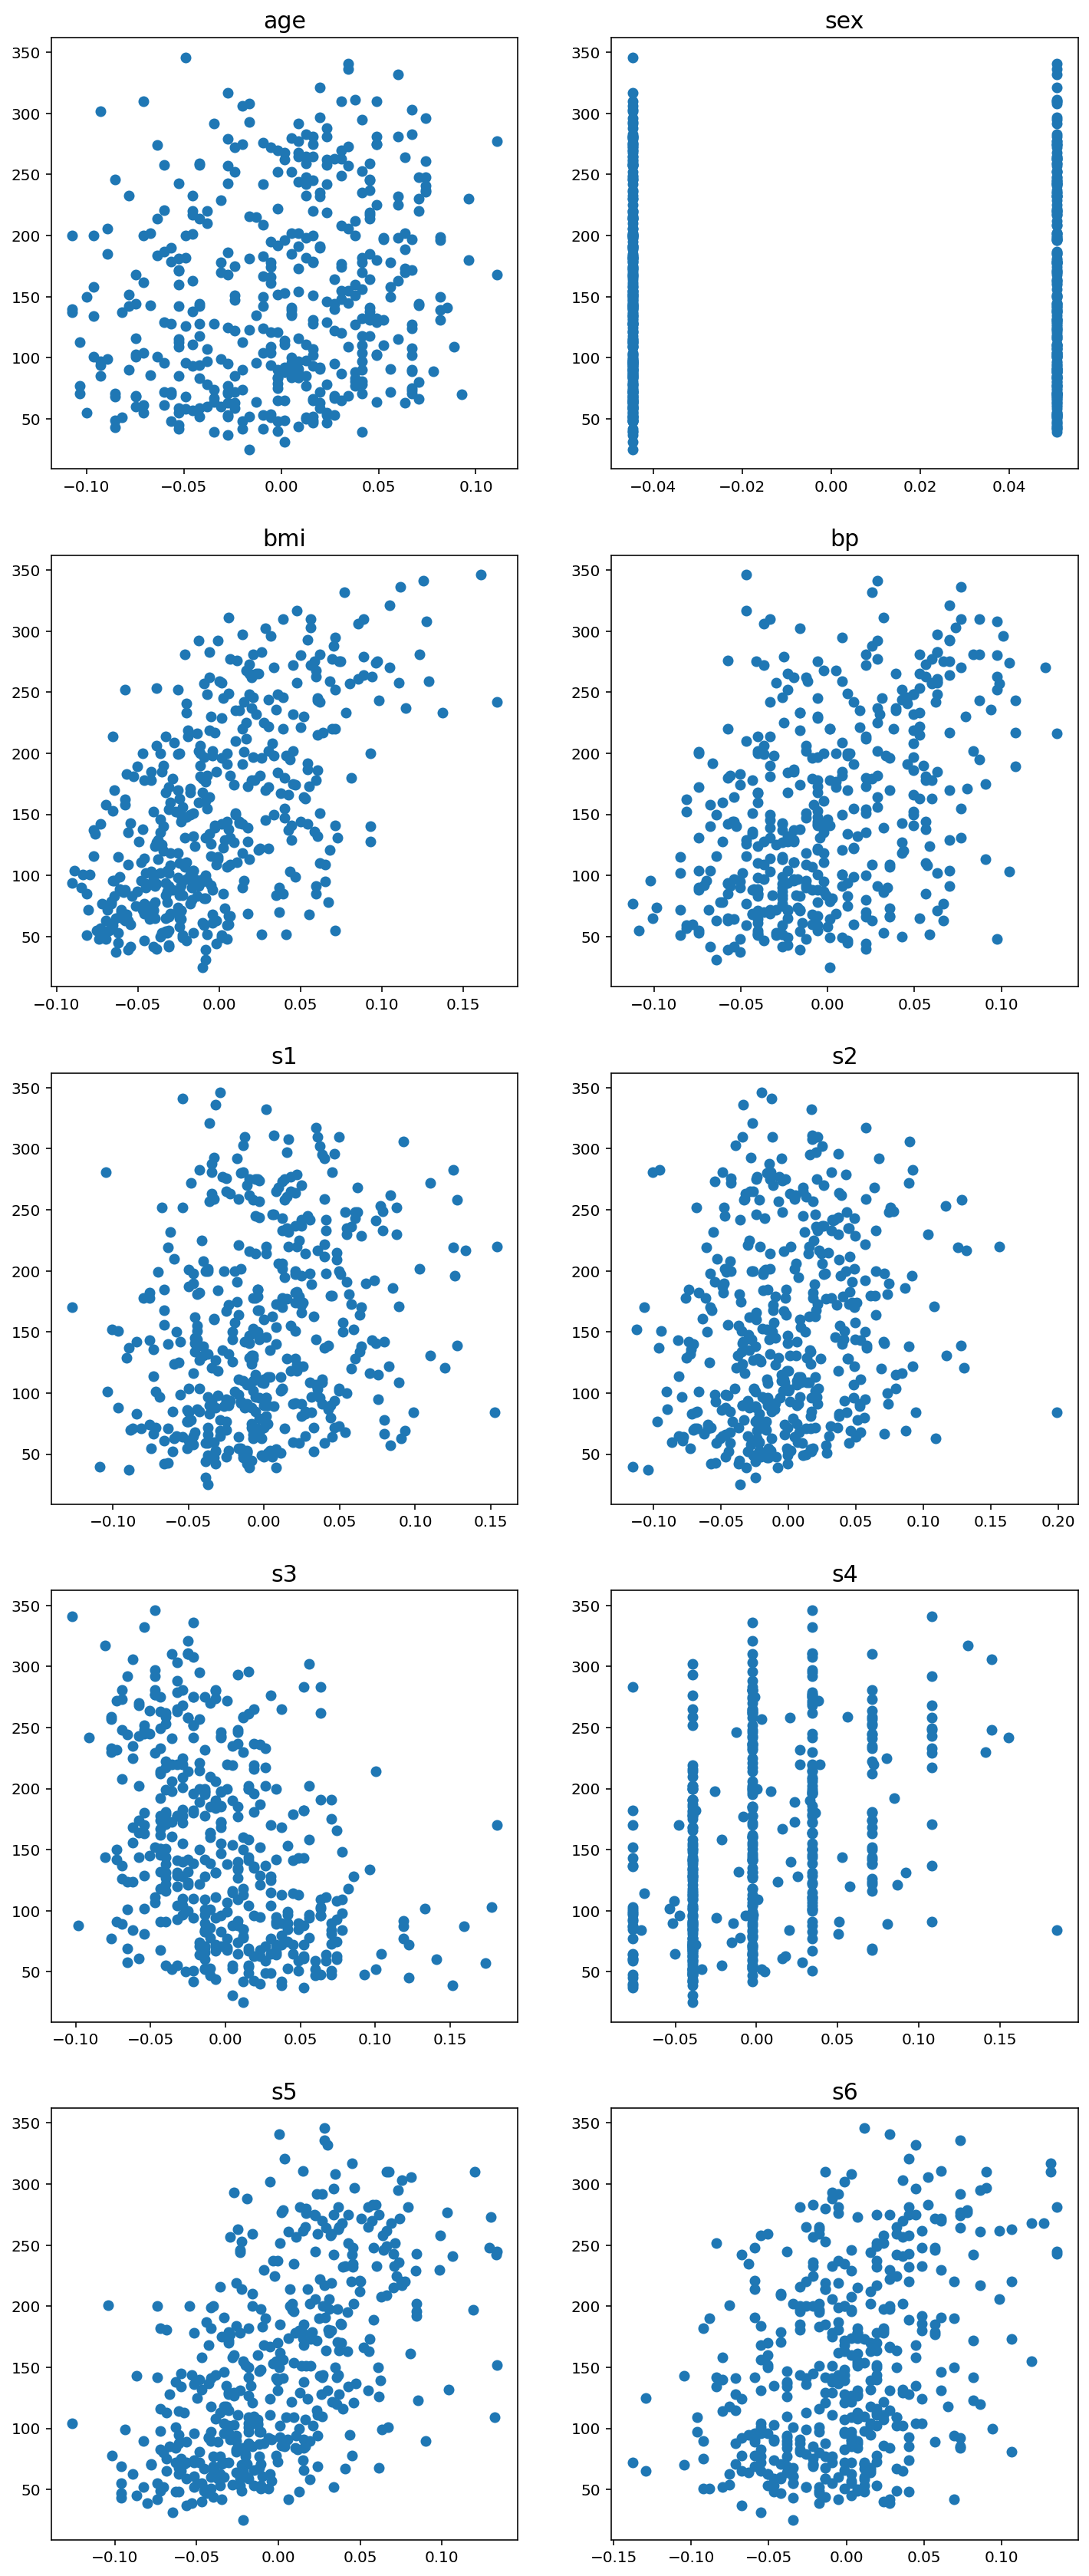

In [7]:
fig, ax = plt.subplots(5,2, figsize=(12, 30))

count = 0
for row in range(5):
    for col in range(2):
        ax[row][col].scatter(df_X.T[count],df_y)
        ax[row][col].set_title(diabetes.feature_names[count], fontsize=15)
        count += 1
        if count == 19 :
            break

# plt.show()

target 값인 당뇨병 수치 0~350 사이의 값을 갖으며, 일부 data_feature와 상관관계를 보인다.

그럼 np.corrcoef()함수를 통해 상관관계를 알아보자.

In [8]:
for i, feature_name in enumerate(diabetes.feature_names):
  print(f'[feature {i+1}] {feature_name} corrcoef : {np.corrcoef(df_X.T[i],df_y)[0,1]}')

[feature 1] age corrcoef : 0.18788875071891983
[feature 2] sex corrcoef : 0.04306199845160539
[feature 3] bmi corrcoef : 0.5864501344746885
[feature 4] bp corrcoef : 0.44148175856257094
[feature 5] s1 corrcoef : 0.21202248101455073
[feature 6] s2 corrcoef : 0.17405358696874254
[feature 7] s3 corrcoef : -0.39478925067091863
[feature 8] s4 corrcoef : 0.43045288474477295
[feature 9] s5 corrcoef : 0.5658825924427441
[feature 10] s6 corrcoef : 0.382483484248581


bmi와 혈중 트리글리세리드 수치 로그값이 가장 높은 상관관계를 갖으며 양의 상관관계이다.

데이터에 대한 이해는 여기까지 해보고 최적의 회귀분석 예측모델을 찾아보자.

y = w * x + b라는 단순선형회귀분석의 최적화된 모델을 찾아보자.

w 는 1* 10의 크기를 갖는 1차원 배열이며, 임의로 값을 넣어보자.
b 는 임의로 전체에 -0.5를 넣자.

In [9]:
w = [2000.,0.,1800.,1000.,2500.,2000.,-2000.,1150.,2000.,2000.]
b = [150., 0., 150., 150., 150., 150.,150.,130.,150.,150.]
W = np.array(w)
B = np.array(b)


이제 모델 함수를 만들어보자.

In [10]:
def model(x,w,b):
  results = []
  for i in range(len(w)):
    result = w[i] * x.T[i] +b[i]
    results.append(result)
  return np.array(results).T

In [11]:
prediction = model(df_X, W,B)

print(prediction)
print(prediction.T.shape)
print(df_X.T.shape)

[[226.15181287   0.         261.05317173 ... 127.0188987  189.81497234
  114.70774968]
 [146.23596694   0.          57.34668977 ...  84.58260969  13.33690581
  -34.40809925]
 [320.59781259   0.         230.01218401 ... 127.0188987  155.72261858
   98.13932202]
 ...
 [233.41688977   0.         121.36872696 ... 117.25855223  56.23493169
  180.98146032]
 [ 59.05504412   0.         220.31187534 ... 160.54356702 239.05745764
   98.13932202]
 [ 59.05504412   0.          18.54545511 ...  84.58260969 141.55697212
  156.12881883]]
(10, 442)
(10, 442)


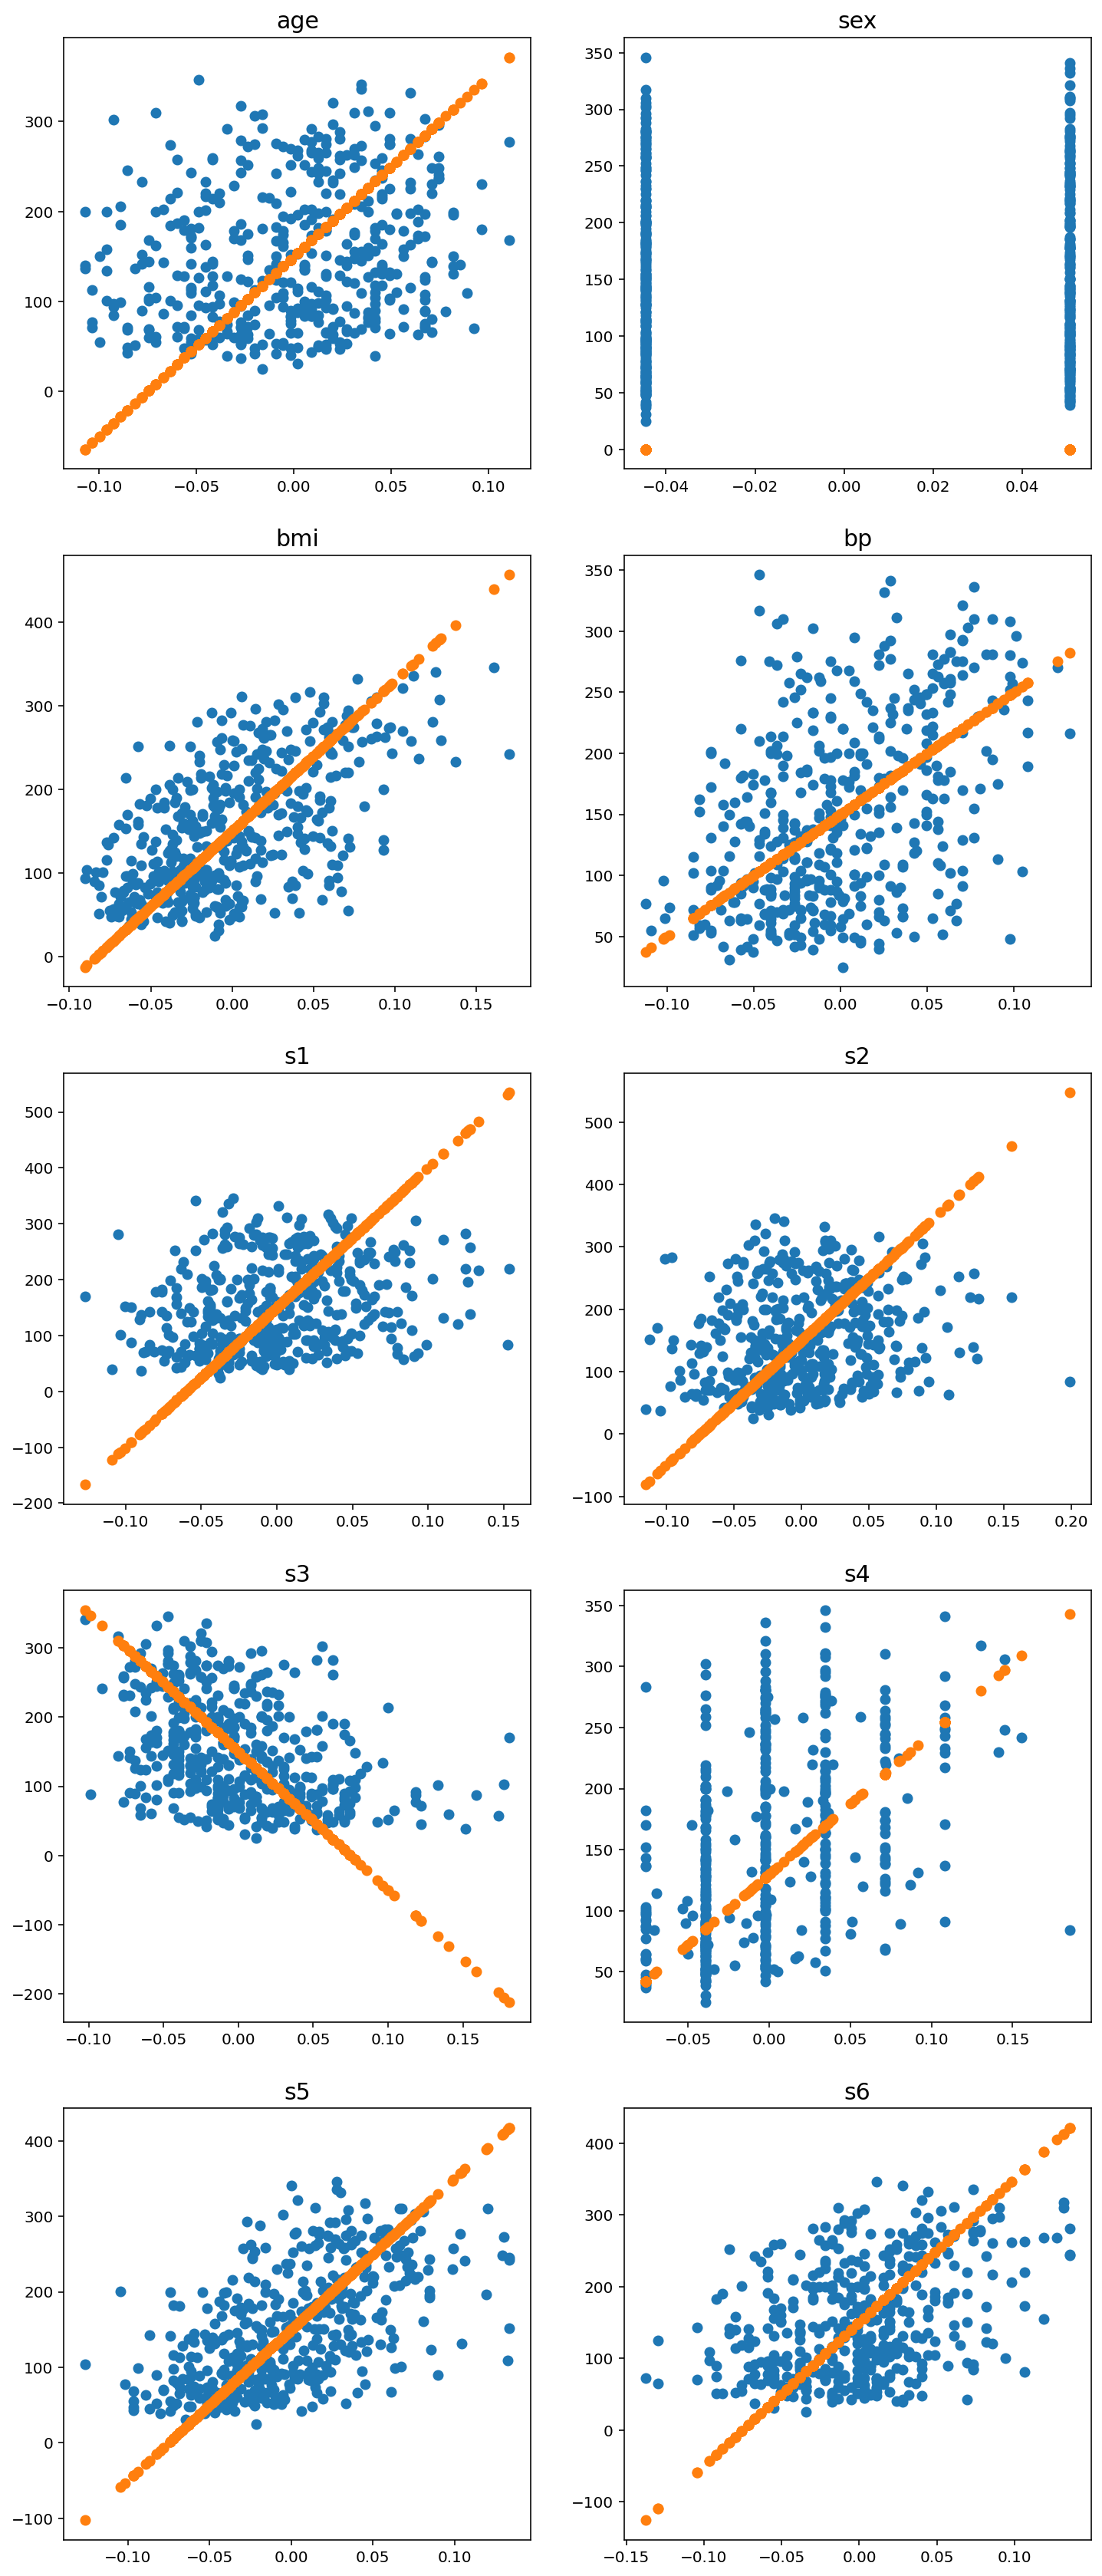

In [12]:
fig, ax = plt.subplots(5,2, figsize=(12, 30))

count = 0
for row in range(5):
    for col in range(2):
        ax[row][col].scatter(df_X.T[count],df_y)
        ax[row][col].scatter(df_X.T[count],prediction.T[count])
        ax[row][col].set_title(diabetes.feature_names[count], fontsize=15)
        count += 1
        if count == 19 :
            break

# plt.show()

## 5. 손실함수 loss 정의하기

- 손실함수를 MSE 함수로 정의하자



In [13]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

In [14]:
MSE(prediction,df_y.reshape(-1,1))

11148.572566790517

임의의 모델에서 MSE값이 11,148.6에 가깝게 나왔다.

3,000 이하로 줄이기 위해 손실함수와 경사하강법을 써서 훈련시켜보자.


In [15]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions.T, y)
    return L

    

## 6. 기울기를 구하는 gradient 함수 구현하자

- 기울기를 계산하는 gradient 함수를 구현하자.

In [16]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


## 7. 하이퍼 파라미터인 학습률 설정하기

- 학습률, learning rate를 설정하자
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정해 실험해보자.

In [17]:
LEARNING_RATE = 0.3

## 8. 모델 학습

- 정의된 손실함수와 기울기 함수로 모델을 학습하자
- loss값이 충분히 떨어질 때까지 학습을 진행하자
- 입력하는 데이터인 X에 들어가는 특성 칼럼들을 몇 개 빼도 괜찮다. 다양한 데이터로 실험해보자.



Iteration 1000 : Loss 9472.6064
Iteration 2000 : Loss 9371.1577
Iteration 3000 : Loss 9364.3315
Iteration 4000 : Loss 9363.8722
Iteration 5000 : Loss 9363.8413
Iteration 6000 : Loss 9363.8392
Iteration 7000 : Loss 9363.8391
Iteration 8000 : Loss 9363.8391
Iteration 9000 : Loss 9363.8391
Iteration 10000 : Loss 9363.8391
Iteration 11000 : Loss 9363.8391
Iteration 12000 : Loss 9363.8391
Iteration 13000 : Loss 9363.8391
Iteration 14000 : Loss 9363.8391
Iteration 15000 : Loss 9363.8391
Iteration 16000 : Loss 9363.8391
Iteration 17000 : Loss 9363.8391
Iteration 18000 : Loss 9363.8391
Iteration 19000 : Loss 9363.8391
Iteration 20000 : Loss 9363.8391
Iteration 21000 : Loss 9363.8391
Iteration 22000 : Loss 9363.8391
Iteration 23000 : Loss 9363.8391
Iteration 24000 : Loss 9363.8391
Iteration 25000 : Loss 9363.8391
Iteration 26000 : Loss 9363.8391
Iteration 27000 : Loss 9363.8391
Iteration 28000 : Loss 9363.8391
Iteration 29000 : Loss 9363.8391
Iteration 30000 : Loss 9363.8391
Iteration 31000 : L

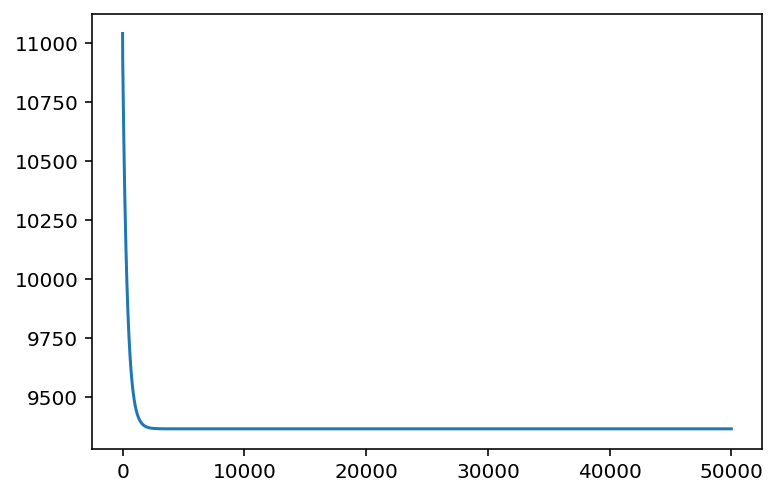

In [18]:
losses = []

for i in range(1, 50001):
    
    dw, db = gradient(X_train, W, B, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    W -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    B -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X_train, W, B, y_train)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

MSE가 3,000 이하로 나와야 루브릭 목표를 달성한다. 하지만 9,363으로 아직 너무 줄여야 할 오차가 많다.

로스값을 줄이기 위한 아이디어를 정리해보면

- 함수 개별로 dw, db를 구하도록 코드 변경
- 훈련량 변경(언더피팅, 오버피팅)
- 학습량(하이퍼파라미터) 튜닝
- train-test-split() 랜덤스테이트 변경

이중에 먼저 함수 개별로 dw, db를 변경해보자.

Iteration 1000 : Loss 9363.8391
Iteration 2000 : Loss 9363.8391
Iteration 3000 : Loss 9363.8391
Iteration 4000 : Loss 9363.8391
Iteration 5000 : Loss 9363.8391
Iteration 6000 : Loss 9363.8391
Iteration 7000 : Loss 9363.8391
Iteration 8000 : Loss 9363.8391
Iteration 9000 : Loss 9363.8391
Iteration 10000 : Loss 9363.8391
Iteration 11000 : Loss 9363.8391
Iteration 12000 : Loss 9363.8391
Iteration 13000 : Loss 9363.8391
Iteration 14000 : Loss 9363.8391
Iteration 15000 : Loss 9363.8391
Iteration 16000 : Loss 9363.8391
Iteration 17000 : Loss 9363.8391
Iteration 18000 : Loss 9363.8391
Iteration 19000 : Loss 9363.8391
Iteration 20000 : Loss 9363.8391
Iteration 21000 : Loss 9363.8391
Iteration 22000 : Loss 9363.8391
Iteration 23000 : Loss 9363.8391
Iteration 24000 : Loss 9363.8391
Iteration 25000 : Loss 9363.8391
Iteration 26000 : Loss 9363.8391
Iteration 27000 : Loss 9363.8391
Iteration 28000 : Loss 9363.8391
Iteration 29000 : Loss 9363.8391
Iteration 30000 : Loss 9363.8391
Iteration 31000 : L

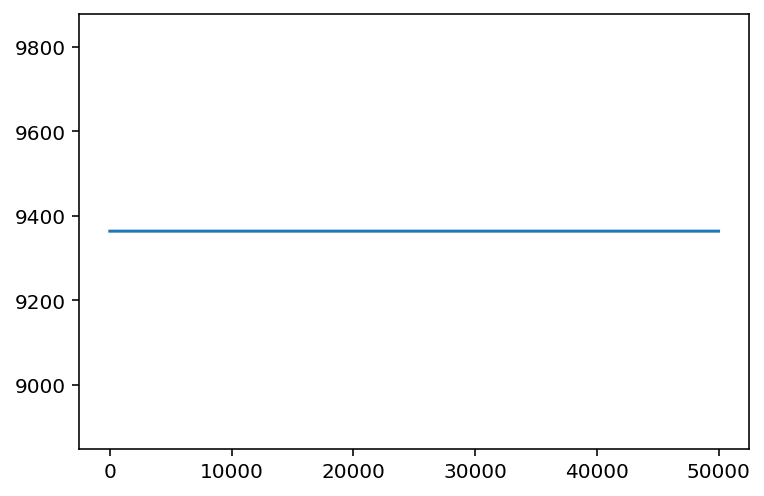

In [19]:
losses = []

for i in range(1, 50001):
    dw, db = gradient(X_train, W, B, y_train)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    W -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    B -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(X_train, W, B, y_train)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

plt.plot(losses)
plt.show()

## 9. test 데이터에 대한 성능 확인

- test 데이터에 대한 성능을 확인하자



In [20]:
prediction_test = model(X_test,W,B)

MSE(prediction_test.T,y_test)

8884.169685948984

MSE가 10,000 정도가 나온다. 매우 높다

현재 작성된 loss함수에서 개별 W, B를 받지 못한다. 
개별 W,B를 받는 모델과 로스함수를 다시 만들어보자.

다시 W를 초기화 시키고 MSE를 구해보자.

In [21]:
w = [2000.,0.,1800.,1000.,2500.,2000.,-2000.,1150.,2000.,2000.]
b = [150., 0., 150., 150., 150., 150.,150.,130.,150.,150.]
W = np.array(w)
B = np.array(b)

In [22]:
import numpy as np
W = np.random.rand(10)      ## 기울기 랜덤 9개
B = np.random.rand()        ## 가중치 랜덤 1개

In [23]:
def model(X, W, B):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += B
    return predictions

In [24]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [25]:
def loss(X, W, B, y):
    predictions = model(X, W, B)
    L = MSE(predictions, y)
    return L

In [26]:
def gradient(X, W, B, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, B)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [27]:
LEARNING_RATE = 0.03

In [28]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, B, y_train)
    W -= LEARNING_RATE * dW
    B -= LEARNING_RATE * db
    L = loss(X_train, W, B, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3068.9049
Iteration 2000 : Loss 3064.7277
Iteration 3000 : Loss 3061.6803
Iteration 4000 : Loss 3059.0365
Iteration 5000 : Loss 3056.6788
Iteration 6000 : Loss 3054.5454
Iteration 7000 : Loss 3052.5998
Iteration 8000 : Loss 3050.8183
Iteration 9000 : Loss 3049.1837
Iteration 10000 : Loss 3047.6822


In [29]:
LEARNING_RATE = 0.0001

In [30]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, B, y_train)
    W -= LEARNING_RATE * dW
    B -= LEARNING_RATE * db
    L = loss(X_train, W, B, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3047.6774
Iteration 2000 : Loss 3047.6726
Iteration 3000 : Loss 3047.6678
Iteration 4000 : Loss 3047.6630
Iteration 5000 : Loss 3047.6582
Iteration 6000 : Loss 3047.6534
Iteration 7000 : Loss 3047.6487
Iteration 8000 : Loss 3047.6439
Iteration 9000 : Loss 3047.6391
Iteration 10000 : Loss 3047.6343


## 10. 정답 데이터와 예측한 데이터를 시각화하자

- x축에는 X데이터의 첫 번째 열을 y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화하자.

In [31]:
print(W)
print(B)

[ -12.98335323 -264.21764614  463.03011131  347.66155436 -359.06950013
  188.38803809 -136.92418394   97.62306287  615.63805906   59.63551658]
153.04256808801608


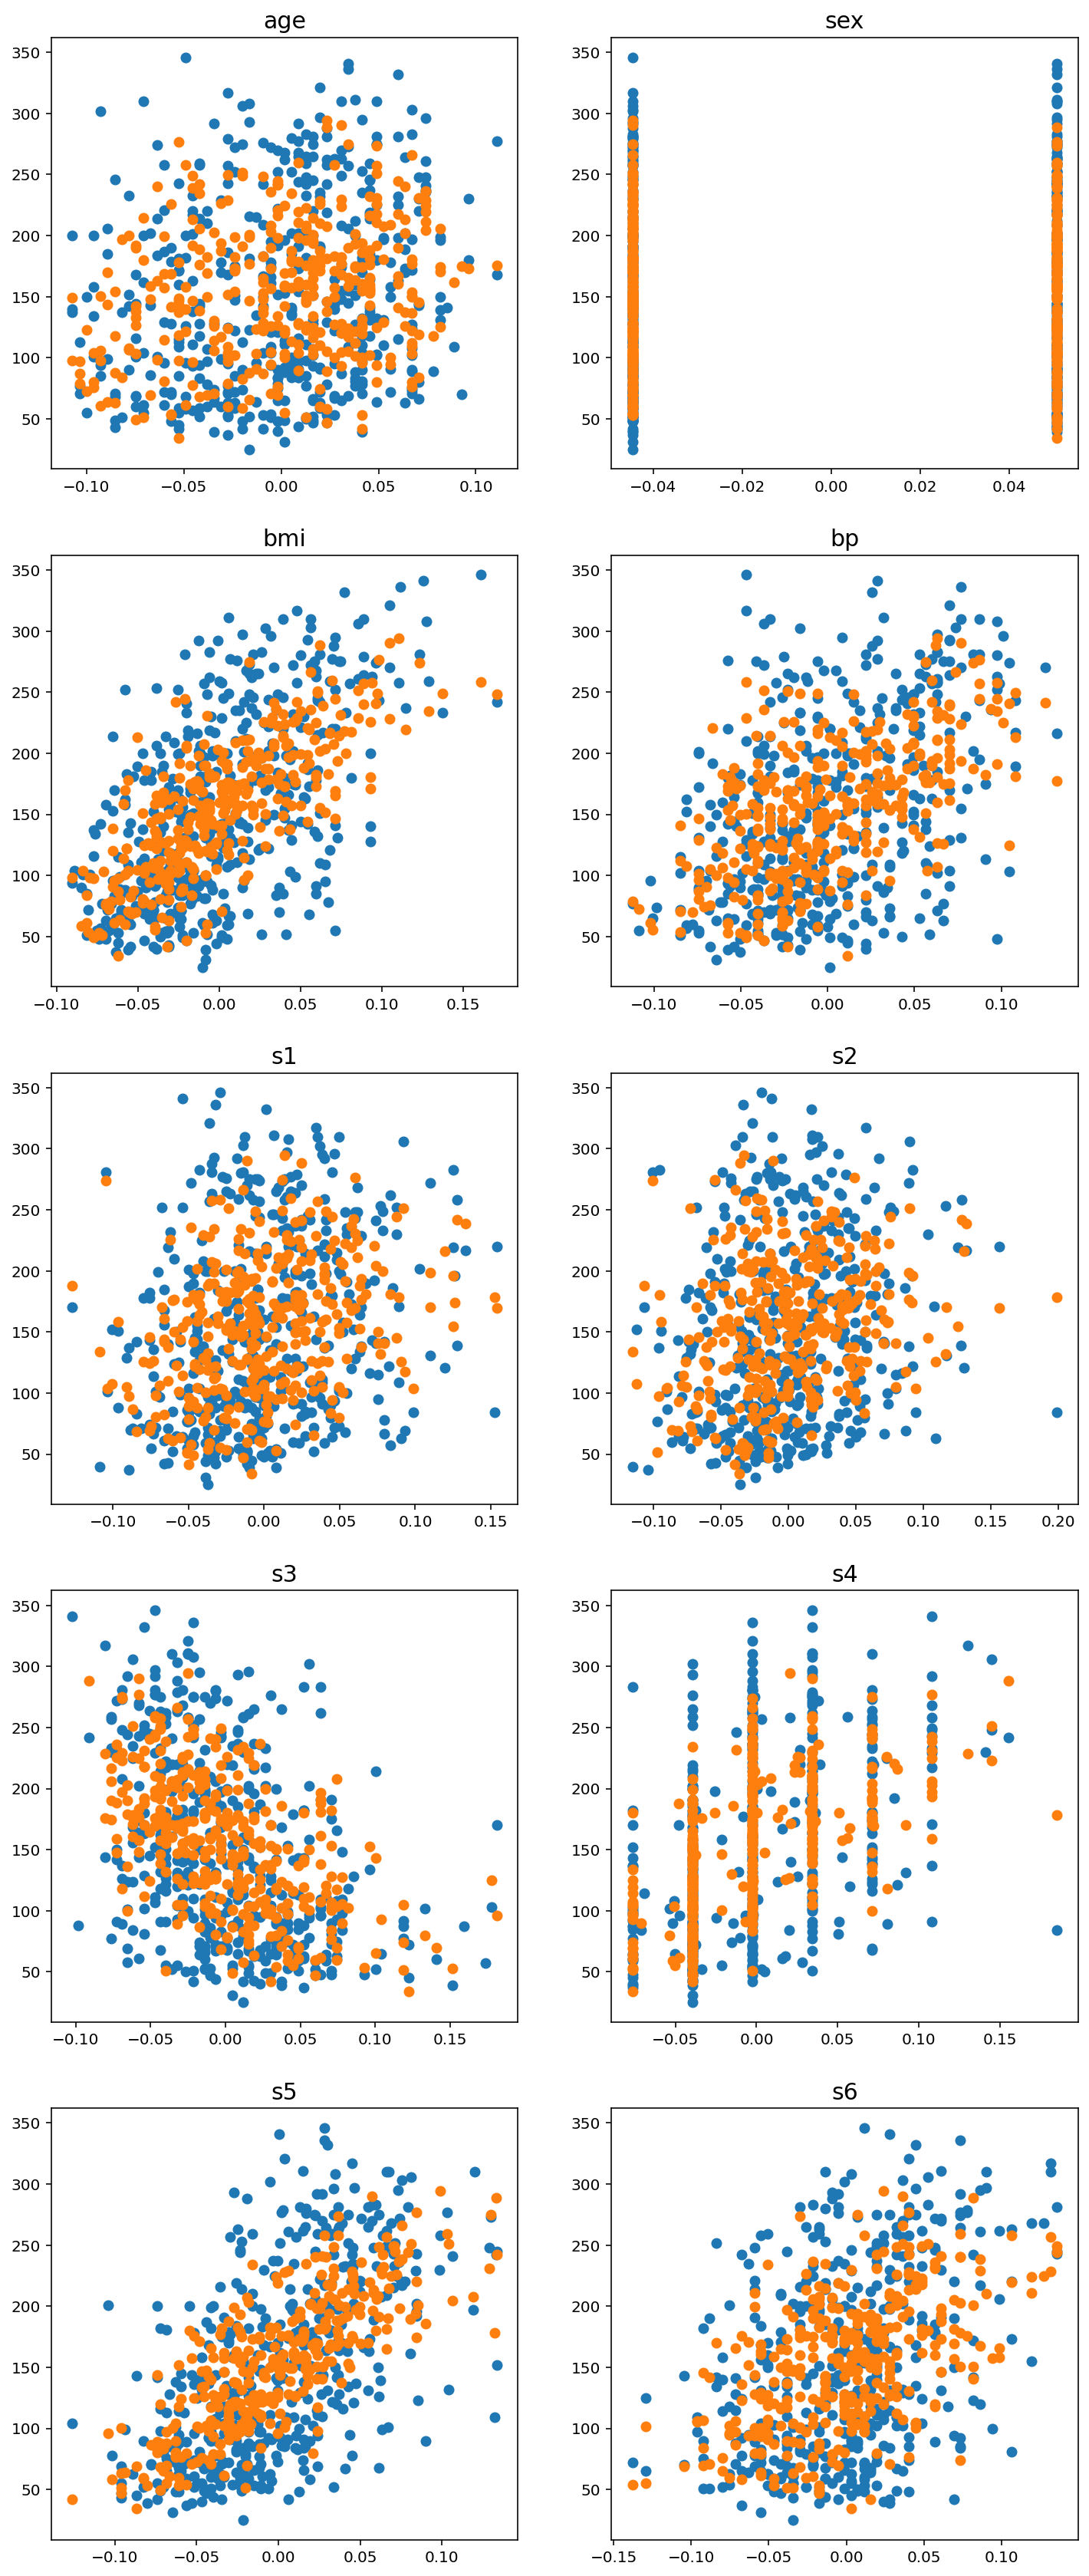

In [32]:
fig, ax = plt.subplots(5,2, figsize=(12, 30))

count = 0
y_pred = model(X_train,W,B)
# print(y_pred.shape)
# print(X_train.shape)
for row in range(5):
    for col in range(2):
        ax[row][col].scatter(df_X.T[count],df_y)
        ax[row][col].scatter(X_train.T[count],y_pred)
        ax[row][col].set_title(diabetes.feature_names[count], fontsize=15)
        count += 1
        if count == 10 :
            break

# plt.show()

# 회고
## 학습노트
이번 노드를 통해서 다양한 시도를 통해 손실함수를 구하고, MSE를 경사하강법으로 최소화 시키는 방법을 시도해봤다.
하이퍼파라미터인 학습률과 반복횟수를 조절하여, 더 나은 방법을 시도했다.

아직은 다중 파라미터에 대한 행렬에 대한 이해가 완벽하지 않아서
모델링하는데 이해하기가 쉽지 않았다.

또 개별 MSE값을 구했는데, MSE값이 많이 높았다. 이러한 부분을 개선하려다가 많이 코드가 꼬여 어려움을 겪었다.
## 고찰
### 최종점수
종합 feature MSE에서 3천 초반에서 더 내려가진 않았다. 

개별 feature의 MSE값을 출력했었는데, MSE값이 전체적으로 컸다. 하지만 어떤 지표가 도움이 되는지 알아보는데 좋았다.
개별 MSE 결과 중에 s5(혈중 트리글리세이드), bmi, s4(전체 혈중 콜레스테롤/고밀도 지질단백질)은 4천대의 MSE를 가져 좀 더 정답에 가까운 예측값을 보여줬다.
데이터가 사라져서 아쉽다. 다시 작성해보도록 하곘다.

age, 나이, 5878.304611748364
sex, 성별, 6035.205452301397
bmi, 비만도, 4268.035035779967
bp, 평균 혈압, 5025.924397437386
s1, 전체 혈중 콜레스테롤, 5767.718773034404
s2, 저밀도 지질단백질, 5850.993106067561
s3, 고밀도 지질단백질, 5083.80137128005
s4, 전체 혈중 콜레스테롤/고밀도 지질단백질, 4945.487295665087
s5, 혈중 트리글리세리드 수치 로그값, 4121.417898811233
s6, 혈당치, 5199.159608114578



# [프로젝트 2-2] 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


## 1. 데이터 가져오기


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [34]:
df_bicycle_train = pd.read_csv("../data/bike-sharing-demand/train.csv")

### Data Fields

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

## 2. datetime 컬럼을 datetime 자료형으로 변환하고, 연,월,일,시,분,초까지 6가지 칼럼 생성하기

In [35]:
import datetime

In [36]:
print(df_bicycle_train)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [37]:
print(df_bicycle_train['datetime'])

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object


In [38]:
df_bicycle_train['datetime'] = pd.to_datetime(df_bicycle_train['datetime'])

In [39]:
print(df_bicycle_train['datetime'][0])
print(df_bicycle_train['datetime'][0].year)
print(df_bicycle_train['datetime'][0].month)
print(df_bicycle_train['datetime'][0].day)
print(df_bicycle_train['datetime'][0].hour)
print(df_bicycle_train['datetime'][0].minute)
print(df_bicycle_train['datetime'][0].second)

2011-01-01 00:00:00
2011
1
1
0
0
0


In [40]:
df_bicycle_train['year'] = df_bicycle_train['datetime'].dt.year
df_bicycle_train['month'] = df_bicycle_train['datetime'].dt.month
df_bicycle_train['day'] = df_bicycle_train['datetime'].dt.day
df_bicycle_train['hour'] = df_bicycle_train['datetime'].dt.hour
df_bicycle_train['minute'] = df_bicycle_train['datetime'].dt.minute
df_bicycle_train['second'] = df_bicycle_train['datetime'].dt.second

df_bicycle_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

/var/folders/dc/g57m8q995hl0n65_3pr5fxnr0000gn/T/ipykernel_67494/3080948979.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


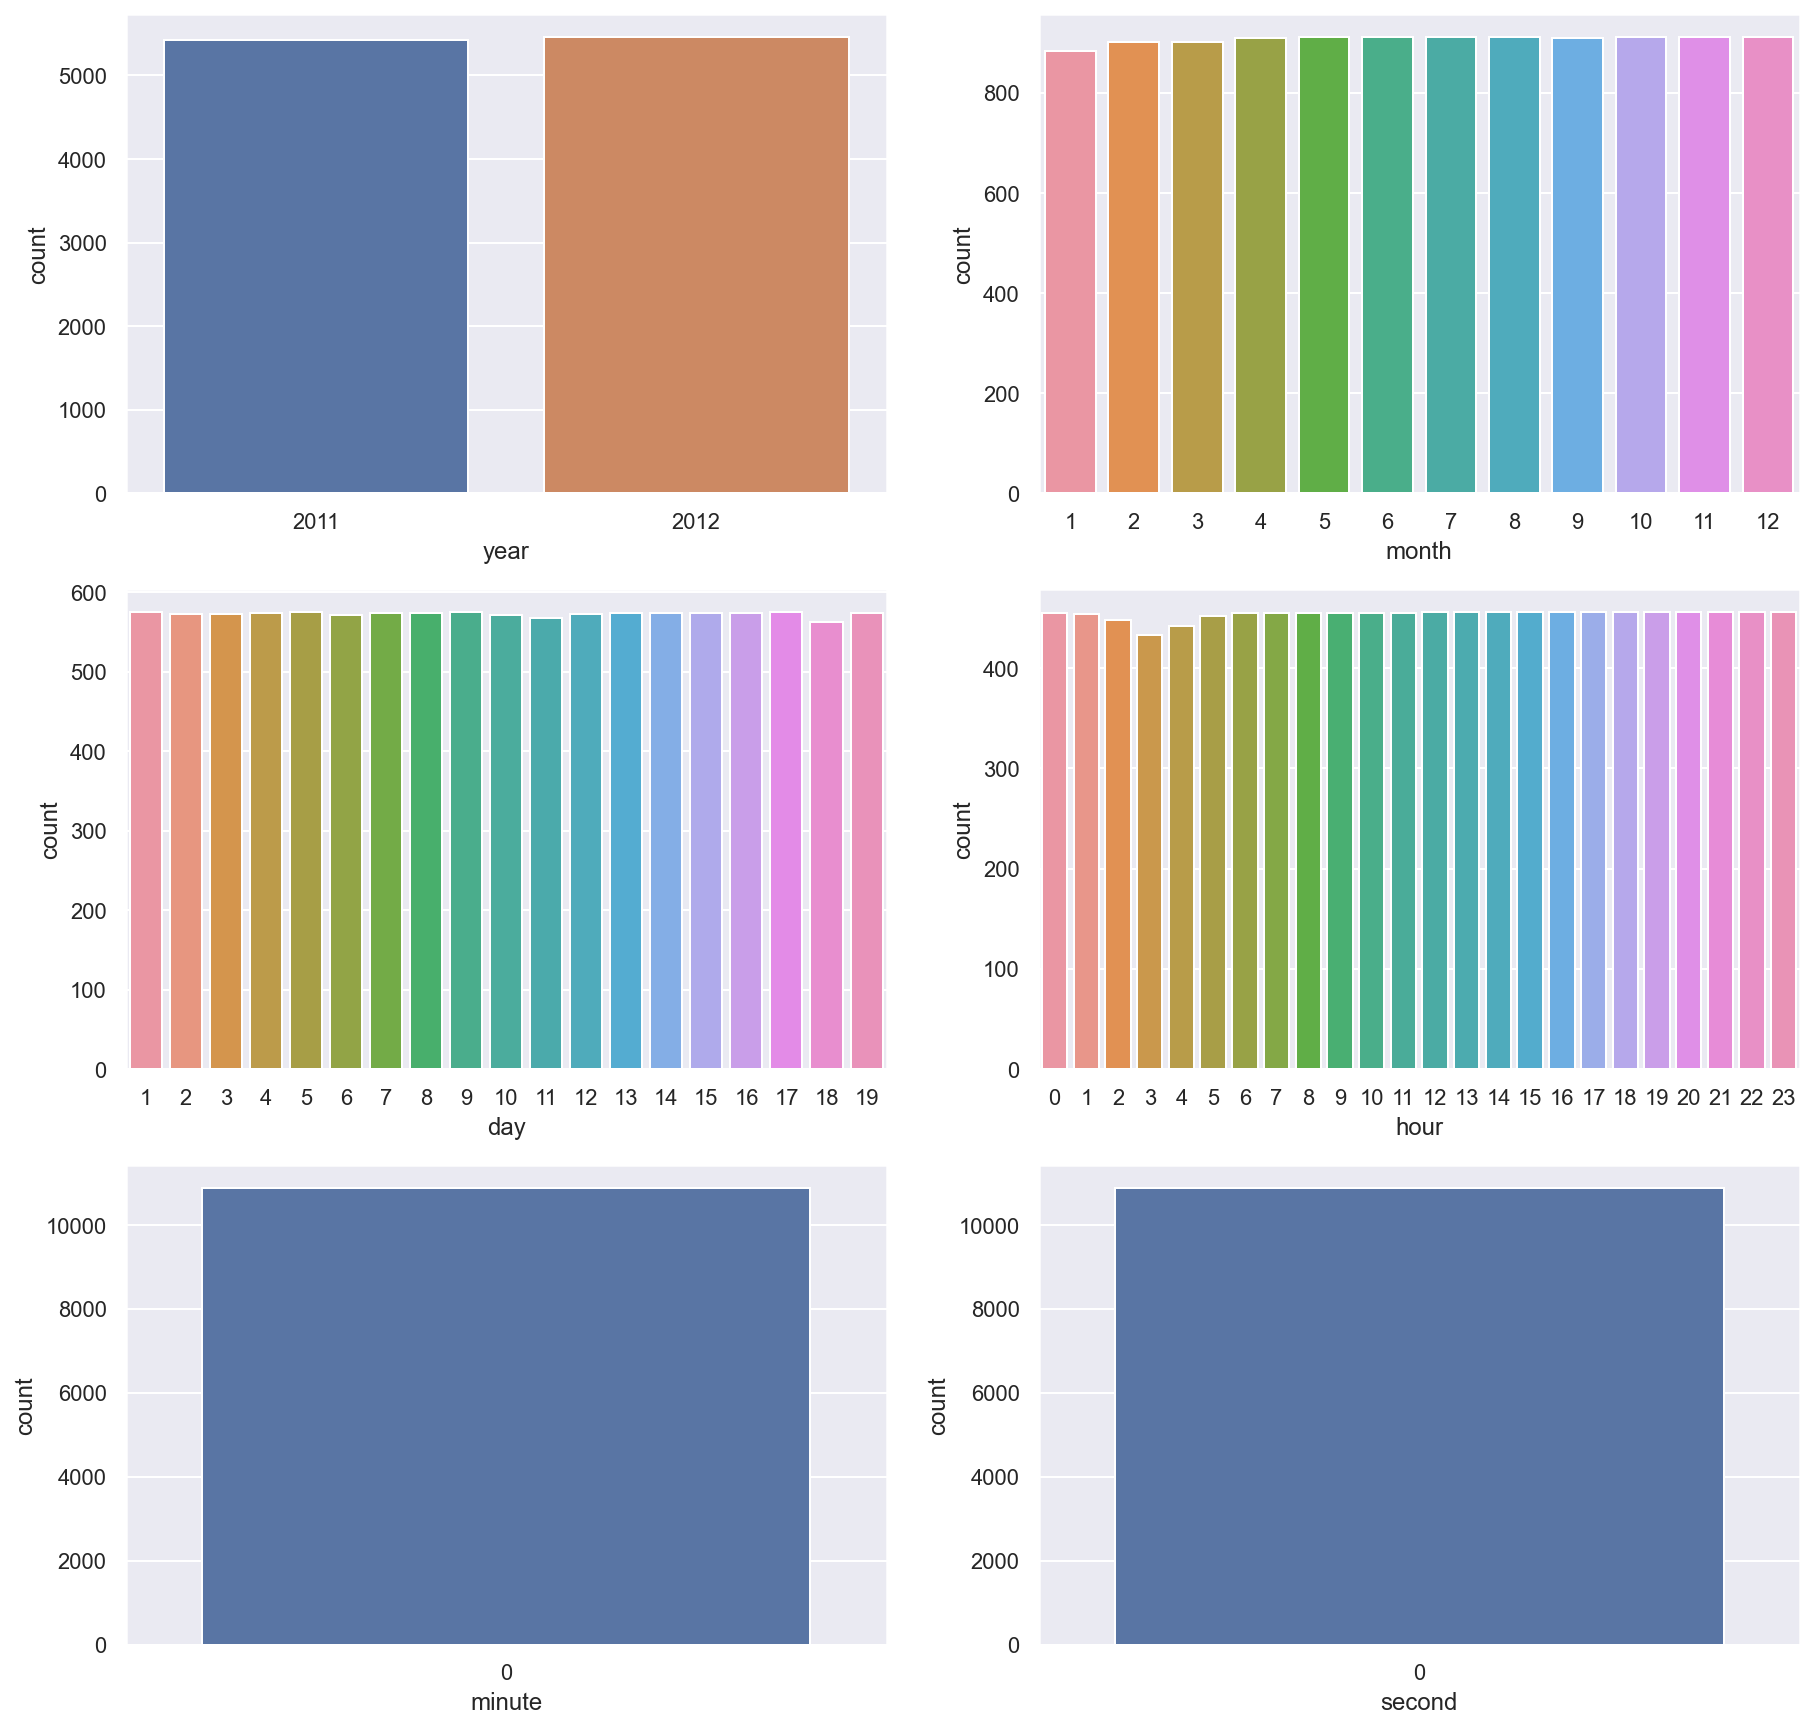

In [46]:
figure, ((ax[0], ax[1]), (ax[2], ax[3]), (ax[4], ax[5])) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15, 15)

sns.countplot(x= df_bicycle_train["year"], ax= ax[0])
sns.countplot(x=df_bicycle_train["month"], ax= ax[1])
sns.countplot(x=df_bicycle_train["day"], ax= ax[2])
sns.countplot(x=df_bicycle_train["hour"], ax= ax[3])
sns.countplot(x=df_bicycle_train["minute"], ax= ax[4])
sns.countplot(x=df_bicycle_train["second"], ax= ax[5])
fig.show()

## 4. X,y 컬럼 선택 및 train/test data split

데이터 필드 컬럼 중 시간정보는 인덱스로 뺴서, count를 target으로 해야한다.
이러한 타겟을 예측하기 위한 feature는 다양하게 가능해보인다.

계절이나 주말이나 평일은 시간에 부분집합으로 포함되어 있으니 제외하도록 하자.

계절정보는 자전거 타는 사람을 예측할 수 있겠다.

그리고, 온도 및 습도, 풍속의 데이터도 모델에 넣을 수 있는 feature로 보인다.

우리가 target으로 정한 count에 이미 casual과 registered가 포함되어 있다.
이번 모델에서 이들을 구분할 필요는 없다.

y 변수에 count 칼럼 데이터 넣기

In [53]:
X = df_bicycle_train['temp']
y = df_bicycle_train['count']

print(X.head())
print(y.head())

print(type(X))
print(type(y))

X = np.array(X)
y = np.array(y)

0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temp, dtype: float64
0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


train_test_split()메서드를 이용해 X, y를 분리해보자.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8708,)
(8708,)
(2178,)
(2178,)


## 5. LinearRegression 모델 학습하기


In [55]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[14.76 13.12 12.3  ... 22.14 18.04 18.86].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 에러를 처리하자

ValueError: Expected 2D array, got 1D array instead:



In [91]:
X = np.array(X)
y = np.array(y)

X.astype(np.float32)
y.astype(np.float32)

array([ 16.,  40.,  32., ..., 168., 129.,  88.], dtype=float32)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))


print(X_train.shape)
print(X_train.reshape(-1, 1).shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(8708,)
(8708, 1)
(8708,)
(2178,)
(2178,)


In [93]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [94]:
linear_model.predict(X_test.reshape(-1, 1))

array([ 88.13402027, 155.90126501, 231.19820361, ..., 261.31697905,
       291.43575449, 253.78728519])

MSE 와 손실함수 구해보기

In [95]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

In [96]:
def loss(x, y):
    predictions = linear_model(x,y)
    L = MSE(predictions, y)
    return L

In [65]:
MSE(X_test,y_test)

61889.45779504132

train,test 데이터를 분리할 때, 컬럼을 특정해서 가져와서 1d 배열 에러가 발생했다. 다시 특정 컬럼만 삭제하고 train_test_split()을 해보자.

In [107]:
temp = df_bicycle_train

temp.drop(labels=['casual','registered',], axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22,0,0


In [108]:
X_train,X_test,y_train,y_test = train_test_split(temp, y, test_size=0.2, random_state=42)

In [109]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

print(X_train.shape)
print(y_train.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(8708, 18)
(8708,)


In [110]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

TypeError가 발생했다. 해결방법을 마땅하게 알아보지 못했다.

In [70]:
temp2 = np.array(temp)

X_train, X_test, y_train, y_test = train_test_split(temp2, y, test_size=0.2, random_state=42)

X_train[:5]

array([[Timestamp('2011-07-06 05:00:00'), 3, 0, 1, 1, 27.88, 31.82, 83,
        6.0032, 5, 30, 35, 2011, 7, 6, 5, 0, 0],
       [Timestamp('2012-08-04 16:00:00'), 3, 0, 0, 1, 36.9, 40.91, 39,
        19.9995, 197, 253, 450, 2012, 8, 4, 16, 0, 0],
       [Timestamp('2012-07-11 15:00:00'), 3, 0, 1, 1, 32.8, 35.605, 41,
        16.9979, 56, 220, 276, 2012, 7, 11, 15, 0, 0],
       [Timestamp('2011-04-10 04:00:00'), 2, 0, 0, 2, 14.76, 18.18, 93,
        7.0015, 3, 2, 5, 2011, 4, 10, 4, 0, 0],
       [Timestamp('2011-11-19 10:00:00'), 4, 0, 0, 1, 13.12, 15.15, 45,
        16.9979, 35, 165, 200, 2011, 11, 19, 10, 0, 0]], dtype=object)

In [119]:
linear_model.fit(X_train,y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [121]:
temp3 = temp.drop(labels=['casual','registered','datetime'], axis=1)


temp3.info()

print(temp3)



X_train, X_test, y_train, y_test = train_test_split(temp3, y, test_size=0.2, random_state=42)

X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
 13  minute      10886 non-null  int64  
 14  second      10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB
       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,minute,second
2815,3,0,1,1,27.88,31.820,83,6.0032,35,2011,7,6,5,0,0
8695,3,0,0,1,36.90,40.910,39,19.9995,450,2012,8,4,16,0,0
8406,3,0,1,1,32.80,35.605,41,16.9979,276,2012,7,11,15,0,0
1543,2,0,0,2,14.76,18.180,93,7.0015,5,2011,4,10,4,0,0
4952,4,0,0,1,13.12,15.150,45,16.9979,200,2011,11,19,10,0,0


In [122]:
linear_model.fit(X_train, y_train)

LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수 값 계산


In [123]:
linear_model.predict(X_test)[:5]

array([127.,  13., 163., 233., 222.])

In [124]:
def MSE(a,b):
  mse = ((a-b)**2).mean()
  return mse

In [125]:
def loss(x, y):
    predictions = linear_model.predict(x)
    L = MSE(predictions, y)
    return L


loss(X_test,y_test)

1.8160131998033461e-25

In [126]:
def RMSE(a,b):
  return (((a-b)**2).mean())**0.5

In [127]:
from sklearn.metrics import mean_squared_error

def loss_rmse(x, y):
    predictions = linear_model.predict(x)
    L = mean_squared_error(y, predictions)
    return L


loss_rmse(X_test,y_test)

1.8160131998033461e-25

In [128]:
def loss_rmse(x, y):
    predictions = linear_model.predict(x)
    L = RMSE(predictions, y)
    return L


loss_rmse(X_test,y_test)

4.261470637941022e-13

## 7. x축은 temp 또는 humidity로, y축은 count로 예측결과 시각화하기

<AxesSubplot:xlabel='temp', ylabel='count'>

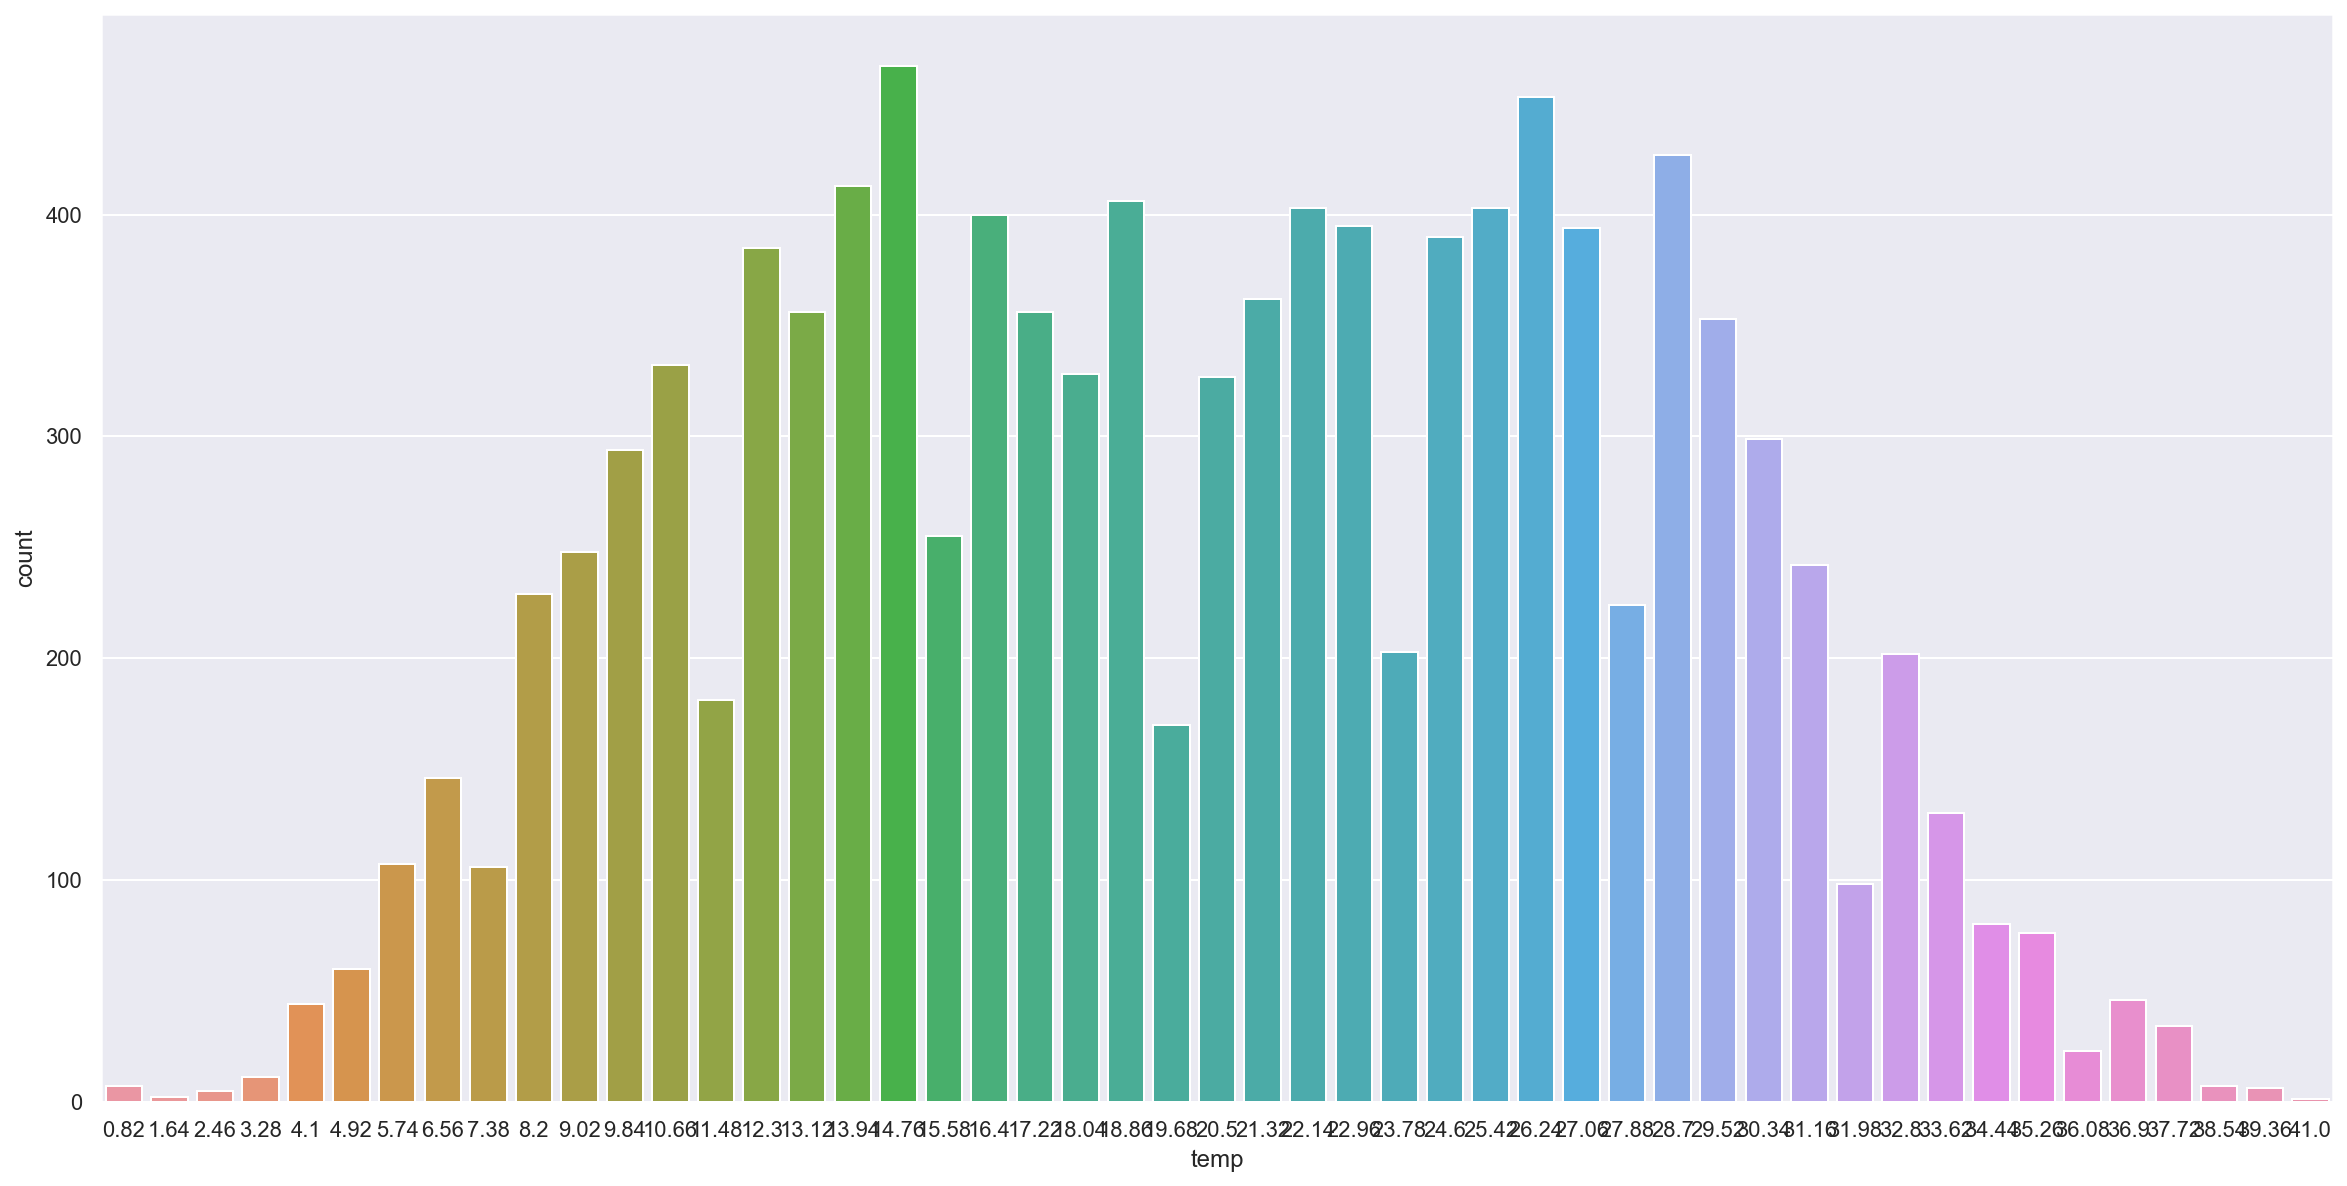

In [129]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot(x=temp3['temp'])

<AxesSubplot:xlabel='humidity', ylabel='count'>

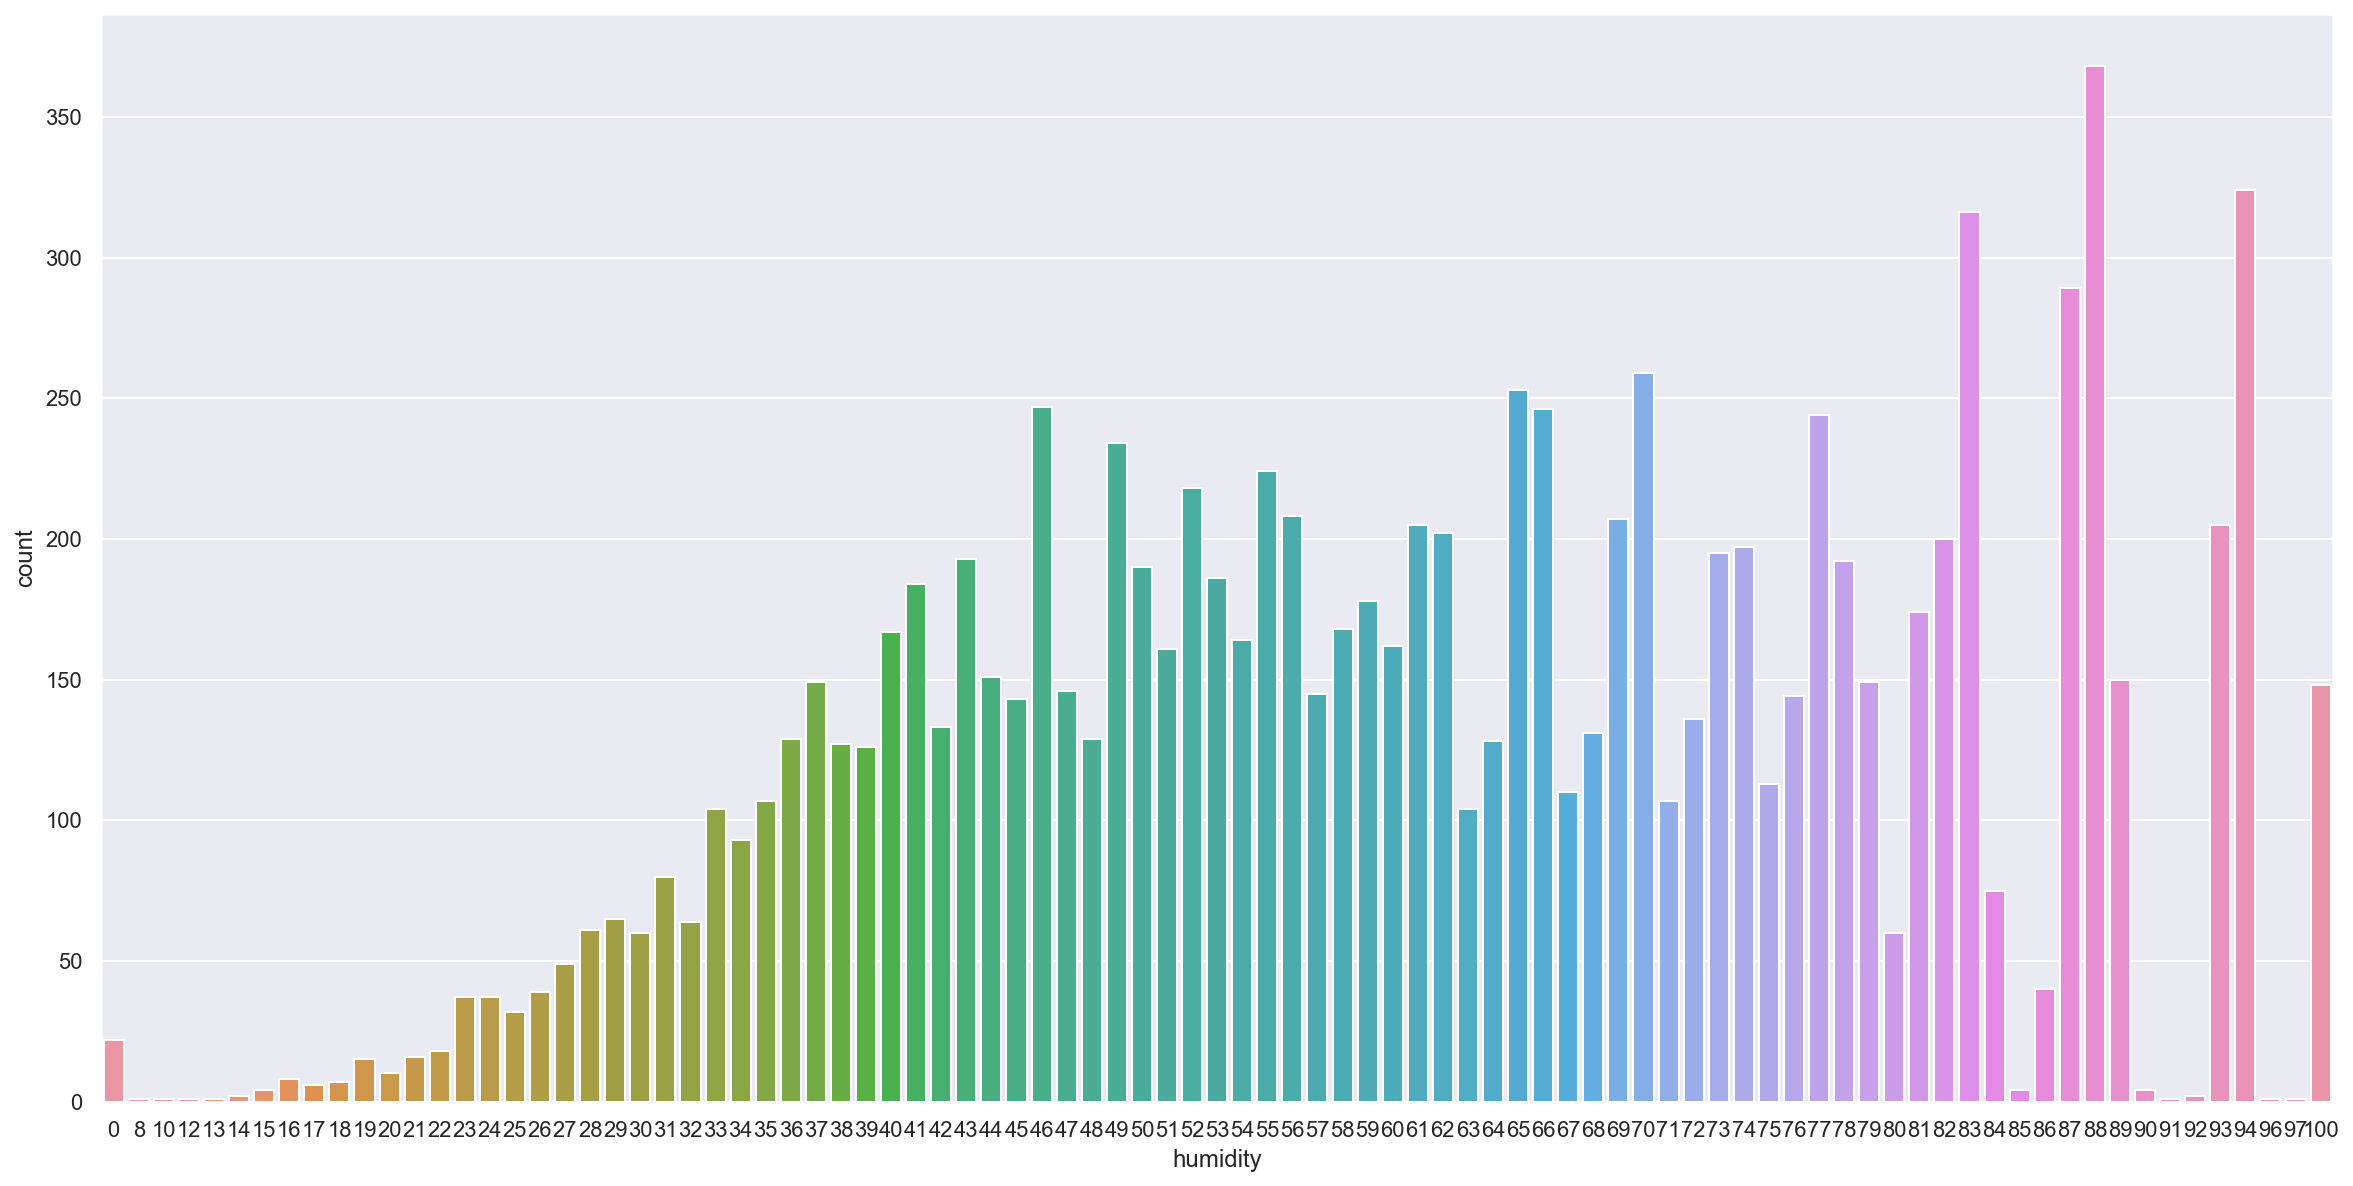

In [130]:
sns.set(rc={'figure.figsize':(20,10)})

sns.countplot(x=temp3['humidity'])

# 회고


## 결과
두 가지 에러가 발생했다. 하나는 해결했지만, 모델 학습에서 발생하는 TypeError를 해결하지 못했다.
MSE 결과값이 출력됐지만 괄과값이 다른 학생들과 다르게 현저하게 낮게 출력된다. 아마도 훈련데이터가 과적합 되거나 그대로 사용해서 평가를 하지 않았나 싶다.
다시 시도해봐야 할 거 같다.

- 데이터 전처리
- 데이터 결측치 및 이상치 제거
- 데이터 학습 및 모델링
- 데이터 평가
- 데이터 시각화

이러한 단계에 대한 연습을 해봤다.
하지만 전처리와 결측치 등의 문제를 명확하게 이해하지 못했기 떄문에 모델링에서 데이터를 넣는데 오류가 발생한것 같다.

앞으로도 미진한 부분을 더 학습해서 진도를 빨리 따라가야겠다.